# Get the genes overlapping the important tokens for ECOLI

In [16]:
import pandas as pd


pd.set_option("display.max_columns", None) # show all cols
pd.set_option('display.max_colwidth', None) # show full width of showing cols
pd.set_option("display.expand_frame_repr", False) # print cols side by side as it's supposed to be

## Read bed files containing tokens

In [1]:
import os
import pandas as pd
from pathlib import Path


bedDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'bed_files', 'ECOLI')

bedDfList = []
for bedFile in os.listdir(bedDir):
    tubeid = bedFile.split('.')[0].split('_')[0]
    tokensDf = pd.read_csv(Path(bedDir, bedFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score'])
    tokensDf['tube_id'] = tubeid
    bedDfList.append(tokensDf)

bedDf = pd.concat(bedDfList, ignore_index=True)
bedDf

,contig_id,start_position,end_position,tokens,score,tube_id
0,1,1,3,GAA,0.024555,AH21B049
1,1,4,12,AAACCCCGG,0.019281,AH21B049
2,1,13,17,TCAAT,0.042749,AH21B049
3,1,18,22,AAGGC,0.058446,AH21B049
4,1,23,27,CGGGG,-0.002272,AH21B049
...,...,...,...,...,...,...
247349726,5,259913,259920,GCTACCCG,0.012245,ALF22C077
247349727,5,259921,259928,TTGGTGTG,0.000125,ALF22C077
247349728,5,259929,259938,CCTGTTCCGT,-0.000540,ALF22C077
247349729,5,259939,259942,GGCC,0.024973,ALF22C077


## Calculate token lengths

In [2]:
bedDf['token_length'] = bedDf.tokens.apply(lambda x: len(x))
bedDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
0,1,1,3,GAA,0.024555,AH21B049,3
1,1,4,12,AAACCCCGG,0.019281,AH21B049,9
2,1,13,17,TCAAT,0.042749,AH21B049,5
3,1,18,22,AAGGC,0.058446,AH21B049,5
4,1,23,27,CGGGG,-0.002272,AH21B049,5
...,...,...,...,...,...,...,...
247349726,5,259913,259920,GCTACCCG,0.012245,ALF22C077,8
247349727,5,259921,259928,TTGGTGTG,0.000125,ALF22C077,8
247349728,5,259929,259938,CCTGTTCCGT,-0.000540,ALF22C077,10
247349729,5,259939,259942,GGCC,0.024973,ALF22C077,4


## Calculate counts of token lengths

In [4]:
tokenlengthCountDf = bedDf.token_length.value_counts().reset_index().sort_values(by=['token_length'], ascending=True)
tokenlengthCountDf

,token_length,count
11,1,322207
9,2,1751088
7,3,8283051
6,4,13288147
4,5,25414480
0,6,60552510
1,7,45341597
2,8,34858185
3,9,33305012
5,10,17681732


## Plot counts of token lengths

<Axes: xlabel='token_length', ylabel='count'>

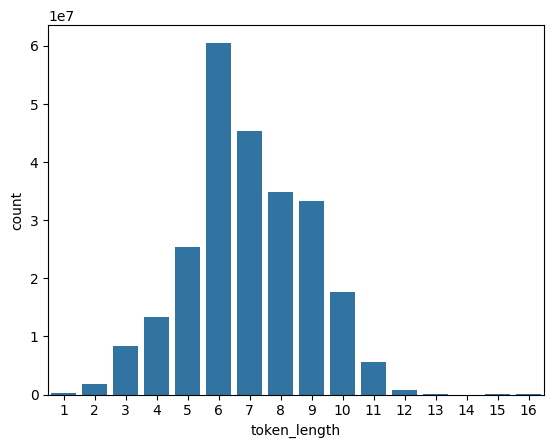

In [5]:
import seaborn as sns

sns.barplot(tokenlengthCountDf, x='token_length', y='count')

## Remove smaller tokens from this analysis

In [6]:
tokensDf = bedDf[bedDf.token_length > 10]
tokensDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
26,1,164,174,CAGCGCCTGTT,0.011924,AH21B049,11
110,1,715,725,CATCAGGATCG,0.045110,AH21B049,11
119,1,776,786,CTGATCCCGCT,0.031756,AH21B049,11
193,1,1271,1282,CAGTTTCTGCGC,0.013142,AH21B049,12
224,1,1492,1502,GGTGCTGGAGT,0.004153,AH21B049,11
...,...,...,...,...,...,...,...
247348945,5,254570,254580,CACCGGCAATA,0.011242,ALF22C077,11
247349053,5,255310,255320,CAGCGATGTGC,0.013561,ALF22C077,11
247349078,5,255479,255489,TATCCGGGCAA,0.038464,ALF22C077,11
247349624,5,259240,259250,CACTGGCTGAA,-0.000851,ALF22C077,11


## Plot attribution score distribution

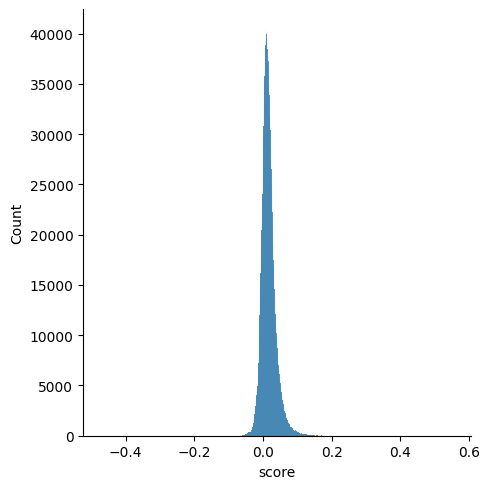

In [7]:
import seaborn as sns


sns.displot(tokensDf.score)

## Plot attribution score distribution (Zoomed)

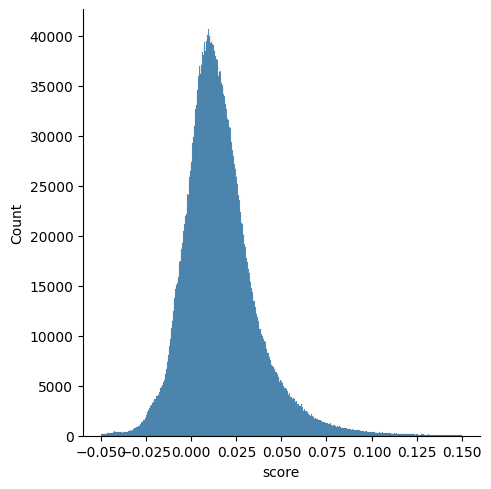

In [8]:
import seaborn as sns


sns.displot(tokensDf[(tokensDf.score > -0.05) & (tokensDf.score < 0.15)].score)

## Calculate high-score cut-off such that ~10 top tokens are selected

In [9]:
highscoreCutoff = tokensDf.score.mean() + 16 * tokensDf.score.std()
highscoreCutoff

np.float64(0.35645461963141545)

## Obtain the number of tokens whose attribution score is over the cut-off

In [10]:
highscoreTokens = tokensDf[(tokensDf.score > highscoreCutoff)].tokens.unique()
len(highscoreTokens)

10

## Display the top tokens whose attribution score is over the cut-off

In [11]:
highscoreTokens

array(['TATAATGCGCC', 'CAGGCACTGAA', 'TATAAATAAAA', 'CTGCCAGACCT',
       'CAGTAATAACA', 'GTAGGCCTGATAAGAC', 'ATTGACGCCAT',
       'GTAGGCCGGATAAGGC', 'CCAGCGTCTGG', 'TGCCTGATGCGCTACG'],
      dtype=object)

## Read token overlaps with annotations

In [12]:
import os
import pandas as pd
from pathlib import Path


overlappingFilesDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'overlapping_with_annotations', 'ECOLI')

overlappingDfList = []
for overlappingFile in os.listdir(overlappingFilesDir):
    df = pd.read_csv(Path(overlappingFilesDir, overlappingFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score', 'feature_type', 'id', 'name', 'gene', 'atributes'])
    df['tube_code'] = [overlappingFile.split('_')[0]]*df.shape[0]
    overlappingDfList.append(df)
overlappingDf = pd.concat(overlappingDfList, ignore_index=True)
overlappingDf


,contig_id,start_position,end_position,tokens,score,feature_type,id,name,gene,atributes,tube_code
0,1,665,671,GAATCAT,0.037687,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,ID=IGMLFD_00005;Name=Uncharacterized deacetyla...,AH19C036
1,1,672,680,TTTATGAAT,0.023426,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,ID=IGMLFD_00005;Name=Uncharacterized deacetyla...,AH19C036
2,1,681,683,AAC,-0.010186,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,ID=IGMLFD_00005;Name=Uncharacterized deacetyla...,AH19C036
3,1,684,689,AAAACC,0.024358,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,ID=IGMLFD_00005;Name=Uncharacterized deacetyla...,AH19C036
4,1,690,698,TTCACCCAG,0.031550,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,ID=IGMLFD_00005;Name=Uncharacterized deacetyla...,AH19C036
...,...,...,...,...,...,...,...,...,...,...,...
92771815,5,357109,357119,CGGCAGACGAA,0.017858,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,ID=KCGHAI_11840;Name=Phage-related protein%2C ...,AH19F069
92771816,5,357120,357125,GGGGAT,0.030131,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,ID=KCGHAI_11840;Name=Phage-related protein%2C ...,AH19F069
92771817,5,357126,357131,GGTGGT,0.045921,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,ID=KCGHAI_11840;Name=Phage-related protein%2C ...,AH19F069
92771818,5,357132,357138,CAGGTTG,-0.022747,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,ID=KCGHAI_11840;Name=Phage-related protein%2C ...,AH19F069


## Get annotation overlaps for high score tokens (signature)

In [19]:
import pandas as pd


tokenOverlapsDfs = []
for highscoreToken in highscoreTokens:
    tokenOverlapsDf = overlappingDf[overlappingDf.tokens == highscoreToken]
    tokenOverlapsDfs.append(tokenOverlapsDf)
finalTokenOverlapsDf = pd.concat(tokenOverlapsDfs, ignore_index=True)
finalTokenOverlapsDf

,contig_id,start_position,end_position,tokens,score,feature_type,id,name,gene,atributes,tube_code
0,2,343817,343827,TATAATGCGCC,0.031700,CDS,NPPFDJ_03745,2-C-methyl-D-erythritol 4-phosphate cytidylyltransferase,NaN,"ID=NPPFDJ_03745;Name=2-C-methyl-D-erythritol 4-phosphate cytidylyltransferase;locus_tag=NPPFDJ_03745;product=2-C-methyl-D-erythritol 4-phosphate cytidylyltransferase;Dbxref=RefSeq:WP_001546116.1,SO:0001217,UniParc:UPI0002A1BA25,UniRef:UniRef100_A0A446EB59,UniRef:UniRef50_J2V2I6,UniRef:UniRef90_A0A446EB59",AH18J011
1,1,205615,205625,TATAATGCGCC,0.077356,CDS,LCHHFM_01045,AI-2 transporter TqsA,tqsA,"ID=LCHHFM_01045;Name=AI-2 transporter TqsA;locus_tag=LCHHFM_01045;product=AI-2 transporter TqsA;Dbxref=BlastRules:WP_001118241,RefSeq:WP_001118241.1,SO:0001217,UniParc:UPI000013A98E,UniRef:UniRef100_P0AFS5,UniRef:UniRef90_P0AFS5;gene=tqsA",AH19F020
2,2,343902,343912,TATAATGCGCC,0.036662,CDS,KDIJOC_04725,2-C-methyl-D-erythritol 4-phosphate cytidylyltransferase,NaN,"ID=KDIJOC_04725;Name=2-C-methyl-D-erythritol 4-phosphate cytidylyltransferase;locus_tag=KDIJOC_04725;product=2-C-methyl-D-erythritol 4-phosphate cytidylyltransferase;Dbxref=RefSeq:WP_001546116.1,SO:0001217,UniParc:UPI0002A1BA25,UniRef:UniRef100_A0A446EB59,UniRef:UniRef50_J2V2I6,UniRef:UniRef90_A0A446EB59",AH20A014
3,1,343836,343846,TATAATGCGCC,0.054989,CDS,MFOPEC_01675,2-C-methyl-D-erythritol 4-phosphate cytidylyltransferase,NaN,"ID=MFOPEC_01675;Name=2-C-methyl-D-erythritol 4-phosphate cytidylyltransferase;locus_tag=MFOPEC_01675;product=2-C-methyl-D-erythritol 4-phosphate cytidylyltransferase;Dbxref=RefSeq:WP_001546116.1,SO:0001217,UniParc:UPI0002A1BA25,UniRef:UniRef100_A0A446EB59,UniRef:UniRef50_J2V2I6,UniRef:UniRef90_A0A446EB59",AH19E004
4,1,321259,321269,TATAATGCGCC,0.030036,CDS,NAIHON_01655,AI-2 transporter TqsA,tqsA,"ID=NAIHON_01655;Name=AI-2 transporter TqsA;locus_tag=NAIHON_01655;product=AI-2 transporter TqsA;Dbxref=BlastRules:WP_001118241,RefSeq:WP_001118241.1,SO:0001217,UniParc:UPI000013A98E,UniRef:UniRef100_P0AFS5,UniRef:UniRef90_P0AFS5;gene=tqsA",AH19K031
...,...,...,...,...,...,...,...,...,...,...,...
4873,2,281950,281965,TGCCTGATGCGCTACG,0.024514,ncRNA,KNFHOH_03390,Nucleoid-associated noncoding RNA 4 (CssrE),naRNA4,"ID=KNFHOH_03390;Name=Nucleoid-associated noncoding RNA 4 (CssrE);locus_tag=KNFHOH_03390;gene=naRNA4;product=Nucleoid-associated noncoding RNA 4 (CssrE);Dbxref=RFAM:RF02564,SO:0000655",AH20E080
4874,4,281890,281905,TGCCTGATGCGCTACG,0.020228,ncRNA,JPMGPJ_07445,Nucleoid-associated noncoding RNA 4 (CssrE),naRNA4,"ID=JPMGPJ_07445;Name=Nucleoid-associated noncoding RNA 4 (CssrE);locus_tag=JPMGPJ_07445;gene=naRNA4;product=Nucleoid-associated noncoding RNA 4 (CssrE);Dbxref=RFAM:RF02564,SO:0000655",AH18K068
4875,4,281890,281905,TGCCTGATGCGCTACG,0.020228,ncRNA,GNINNL_08800,Nucleoid-associated noncoding RNA 4 (CssrE),naRNA4,"ID=GNINNL_08800;Name=Nucleoid-associated noncoding RNA 4 (CssrE);locus_tag=GNINNL_08800;gene=naRNA4;product=Nucleoid-associated noncoding RNA 4 (CssrE);Dbxref=RFAM:RF02564,SO:0000655",AH20F059
4876,4,264543,264558,TGCCTGATGCGCTACG,0.028266,ncRNA,JOJKLJ_06825,Nucleoid-associated noncoding RNA 4 (CssrE),naRNA4,"ID=JOJKLJ_06825;Name=Nucleoid-associated noncoding RNA 4 (CssrE);locus_tag=JOJKLJ_06825;gene=naRNA4;product=Nucleoid-associated noncoding RNA 4 (CssrE);Dbxref=RFAM:RF02564,SO:0000655",AH19D040


## Explore annotation overlaps for high score tokens (signature)

In [32]:
overlapCountsDf = finalTokenOverlapsDf.groupby(by=['tokens', 'name', 'feature_type']).agg({'contig_id': 'count'}).reset_index().sort_values(by='contig_id', ascending=False)
overlapCountsDf

,tokens,name,feature_type,contig_id
58,CAGGCACTGAA,glutathione ABC transporter substrate-binding protein GsiB,CDS,151
130,CCAGCGTCTGG,murein lipoprotein Lpp,CDS,151
139,CTGCCAGACCT,1%2C4-dihydroxy-2-naphthoyl-CoA hydrolase,CDS,151
16,ATTGACGCCAT,UDP-4-amino-4-deoxy-L-arabinose aminotransferase,CDS,144
86,CAGTAATAACA,ferrienterobactin ABC transporter permease,CDS,135
...,...,...,...,...
175,TATAAATAAAA,RHH-1 domain-containing protein,CDS,1
177,TATAAATAAAA,SopA family protein,CDS,1
180,TATAAATAAAA,hypothetical protein,CDS,1
179,TATAAATAAAA,WfcC,CDS,1


## Save annotation overlaps for high score tokens (signature)

In [33]:
import os

from pathlib import Path


overlapCountsDf.to_csv(Path(os.environ['GENOMICS_DATA_BASE'], 'survival_analysis', 'ECOLI', 'annotation_overlap_counts.csv'), index=False)